In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler,OneHotEncoder
from sklearn.cluster import KMeans

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [34]:
datasets = pd.read_csv("heart.csv")

In [35]:
datasets.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [36]:
datasets.shape

(303, 14)

In [37]:
datasets.describe

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1  

In [38]:
for column in datasets.columns:
    distinct_value = len(datasets[column].unique())
    print(f"{column}: {distinct_value} distinct values")

age: 41 distinct values
sex: 2 distinct values
cp: 4 distinct values
trestbps: 49 distinct values
chol: 152 distinct values
fbs: 2 distinct values
restecg: 3 distinct values
thalach: 91 distinct values
exang: 2 distinct values
oldpeak: 40 distinct values
slope: 3 distinct values
ca: 5 distinct values
thal: 4 distinct values
target: 2 distinct values


In [39]:
duplicate_data = datasets[datasets.duplicated()]
print("No. of Duplicate Rows: ", duplicate_data)

No. of Duplicate Rows:       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1  


In [40]:
datasets = datasets.drop_duplicates()

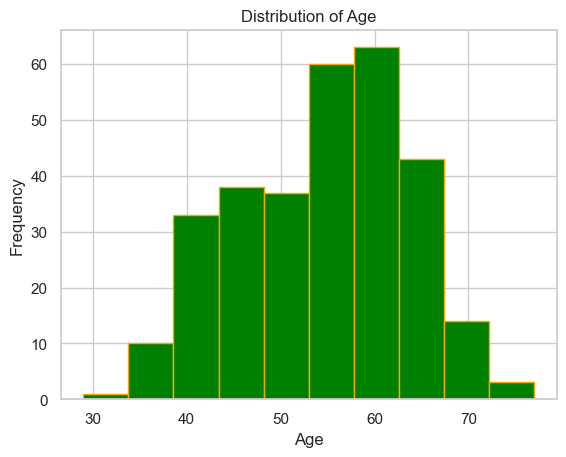

In [41]:
plt.hist(datasets['age'], bins=10, color='green', edgecolor='orange')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

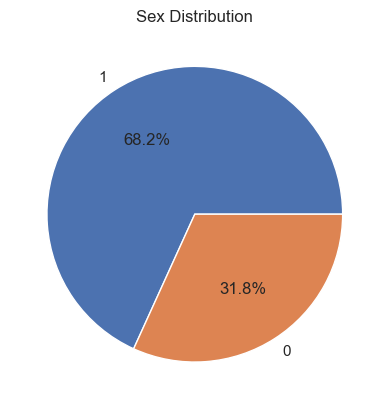

In [42]:
sex_count = datasets['sex'].value_counts()
plt.pie(sex_count, labels=sex_count.index, autopct='%1.1f%%')
plt.title('Sex Distribution')
plt.show()

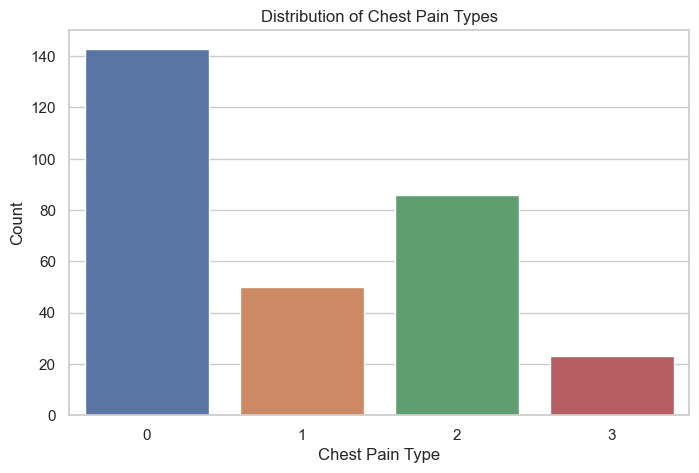

In [43]:
plt.figure(figsize=(8, 5))
sns.countplot(x='cp', data=datasets)
plt.title('Distribution of Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

In [44]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


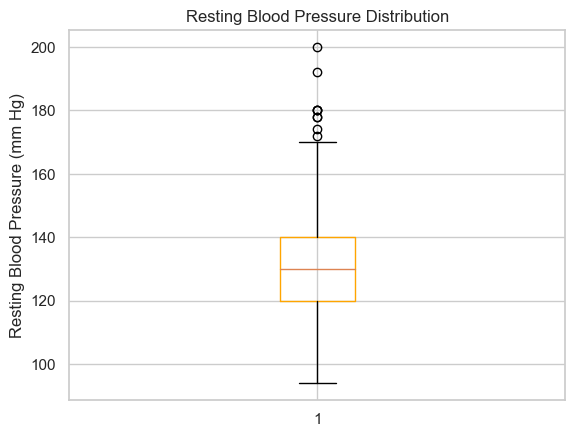

In [46]:
import matplotlib.pyplot as plt

# Assuming 'datasets' is your DataFrame
plt.boxplot(datasets['trestbps'], boxprops=dict(color='orange'))
plt.title('Resting Blood Pressure Distribution')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.show()

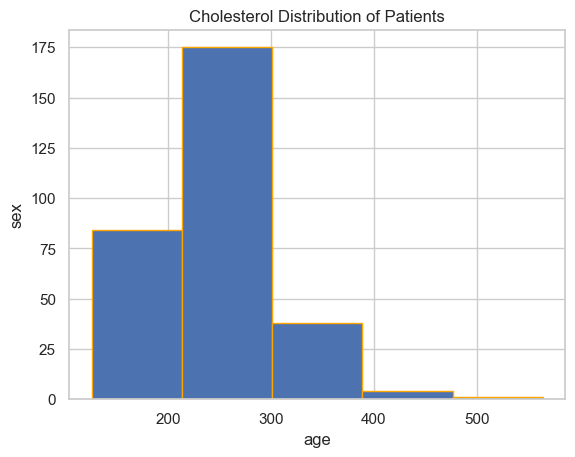

In [47]:
plt.hist(datasets['chol'], bins=5, edgecolor='orange')
plt.title('Cholesterol Distribution of Patients')
plt.xlabel('age')
plt.ylabel('sex')
plt.show()

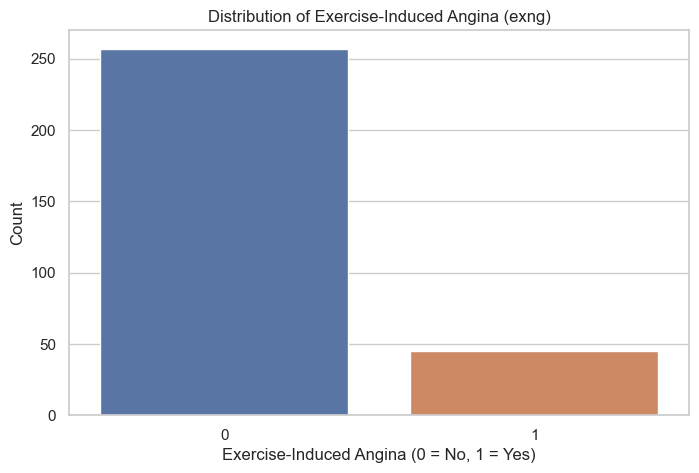

In [48]:

plt.figure(figsize=(8, 5))
sns.countplot(x='fbs', data=datasets)
plt.title('Distribution of Exercise-Induced Angina (exng)')
plt.xlabel('Exercise-Induced Angina (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

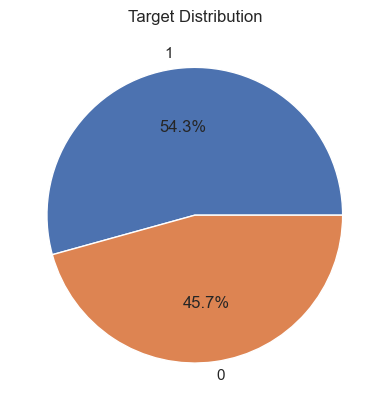

In [49]:
target_count = datasets['target'].value_counts()
plt.pie(target_count, labels=target_count.index, autopct='%1.1f%%')
plt.title('Target Distribution')
plt.show()

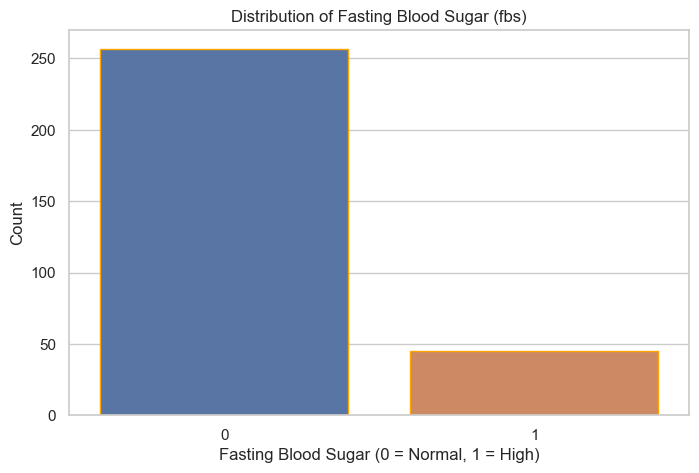

In [50]:
plt.figure(figsize=(8, 5))
sns.countplot(x='fbs', data=datasets,edgecolor='orange')
plt.title('Distribution of Fasting Blood Sugar (fbs)')
plt.xlabel('Fasting Blood Sugar (0 = Normal, 1 = High)')
plt.ylabel('Count')
plt.show()

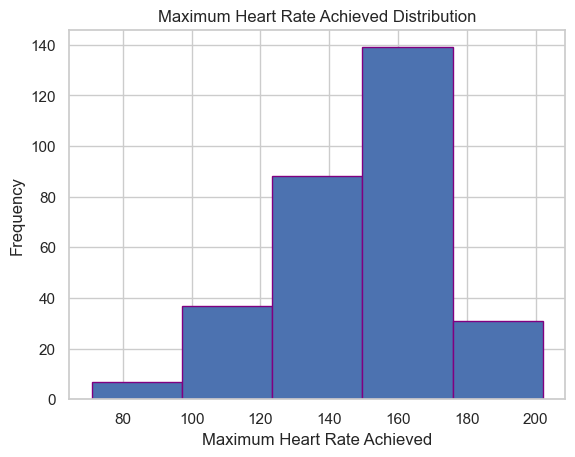

In [51]:
plt.hist(datasets['thalach'], bins=5, edgecolor='purple')
plt.title('Maximum Heart Rate Achieved Distribution')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Frequency')
plt.show()

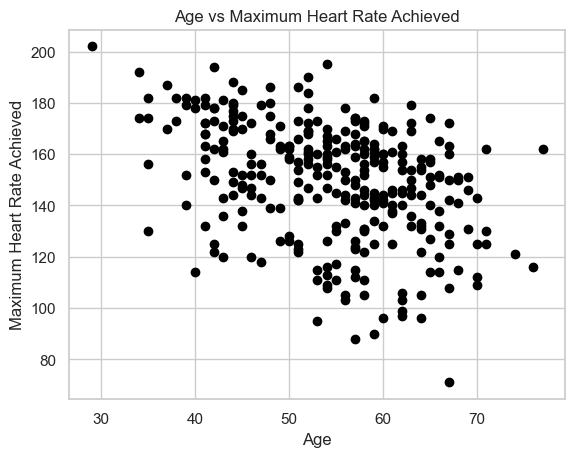

In [52]:
plt.scatter(datasets['age'], datasets['thalach'], color='black')
plt.title('Age vs Maximum Heart Rate Achieved')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()

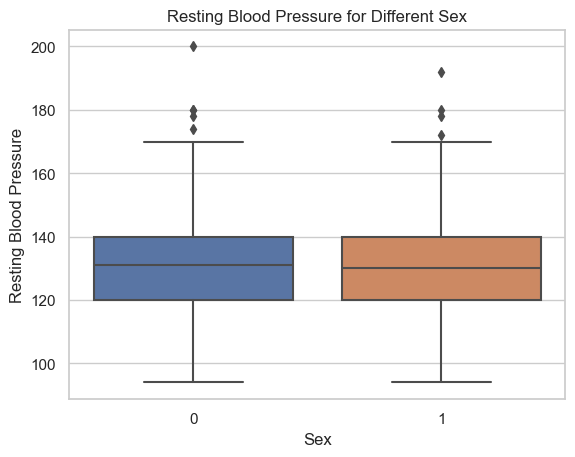

In [53]:
sns.boxplot(x='sex', y='trestbps', data=datasets)
plt.title('Resting Blood Pressure for Different Sex')
plt.xlabel('Sex')
plt.ylabel('Resting Blood Pressure')
plt.show()

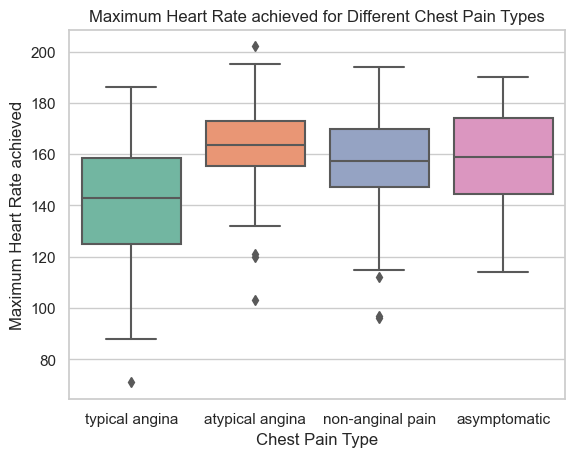

In [54]:
sns.set(style="whitegrid")
sns.boxplot(x='cp', y='thalach', data=datasets, palette='Set2') 
plt.title('Maximum Heart Rate achieved for Different Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Maximum Heart Rate achieved')
plt.xticks(ticks=[0, 1, 2, 3], labels=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])
plt.show()


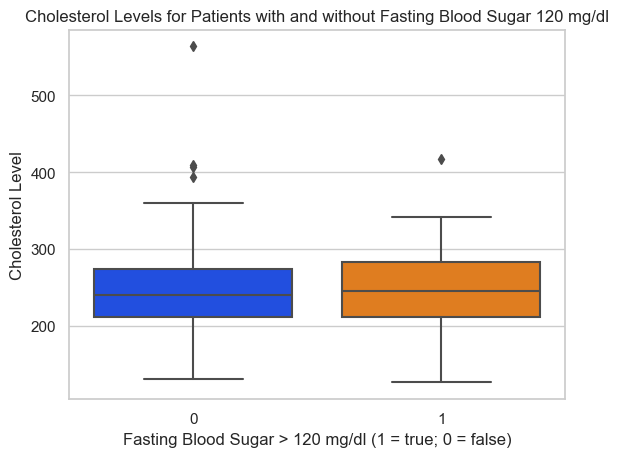

In [55]:
sns.boxplot(x='fbs', y='chol', data=datasets, palette='bright')
plt.title('Cholesterol Levels for Patients with and without Fasting Blood Sugar 120 mg/dl')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl (1 = true; 0 = false)')
plt.ylabel('Cholesterol Level')
plt.show()

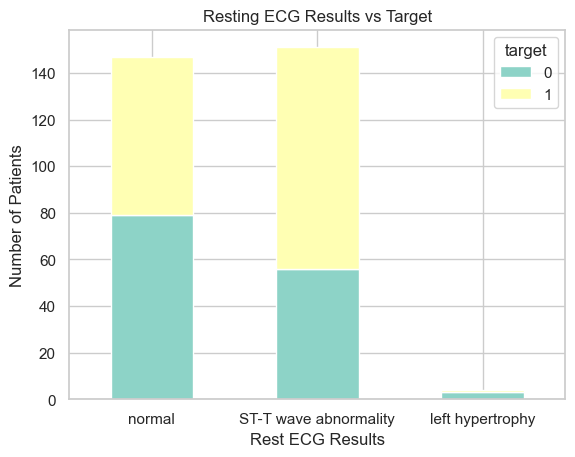

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'datasets' is your DataFrame

# Set the Seaborn style
sns.set(style="whitegrid")

# Replace 'output' with the actual column name you want to use for grouping
restecg_target = datasets.groupby(['restecg', 'target']).size().unstack().fillna(0)
restecg_target.plot(kind='bar', stacked=True, color=sns.color_palette("Set3"))

# Customize the plot
plt.title('Resting ECG Results vs Target')
plt.xlabel('Rest ECG Results')
plt.ylabel('Number of Patients')
plt.xticks(ticks=[0, 1, 2], labels=['normal', 'ST-T wave abnormality', 'left hypertrophy'], rotation=0)

# Display the plot
plt.show()


In [57]:
# Print the columns in your DataFrame
print(datasets.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


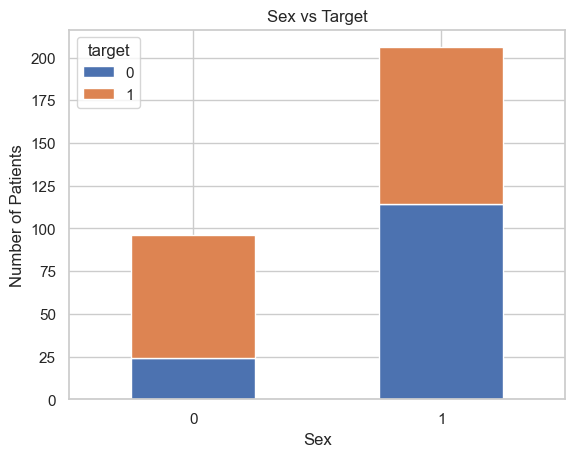

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'datasets' is your DataFrame

# Set the Seaborn style
sns.set(style="whitegrid")

# Verify column existence for 'sex' and target variable
required_columns = ['sex', 'target']
missing_columns = [col for col in required_columns if col not in datasets.columns]

if missing_columns:
    raise ValueError(f"Required columns not found in the DataFrame: {missing_columns}")

# Group the data and create a stacked bar chart
sex_target = datasets.groupby(required_columns).size().unstack().fillna(0)
sex_target.plot(kind='bar', stacked=True)

# Customize the plot
plt.title('Sex vs Target')
plt.xlabel('Sex')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)

# Display the plot
plt.show()


In [59]:
correlation_matrix = datasets.corr()

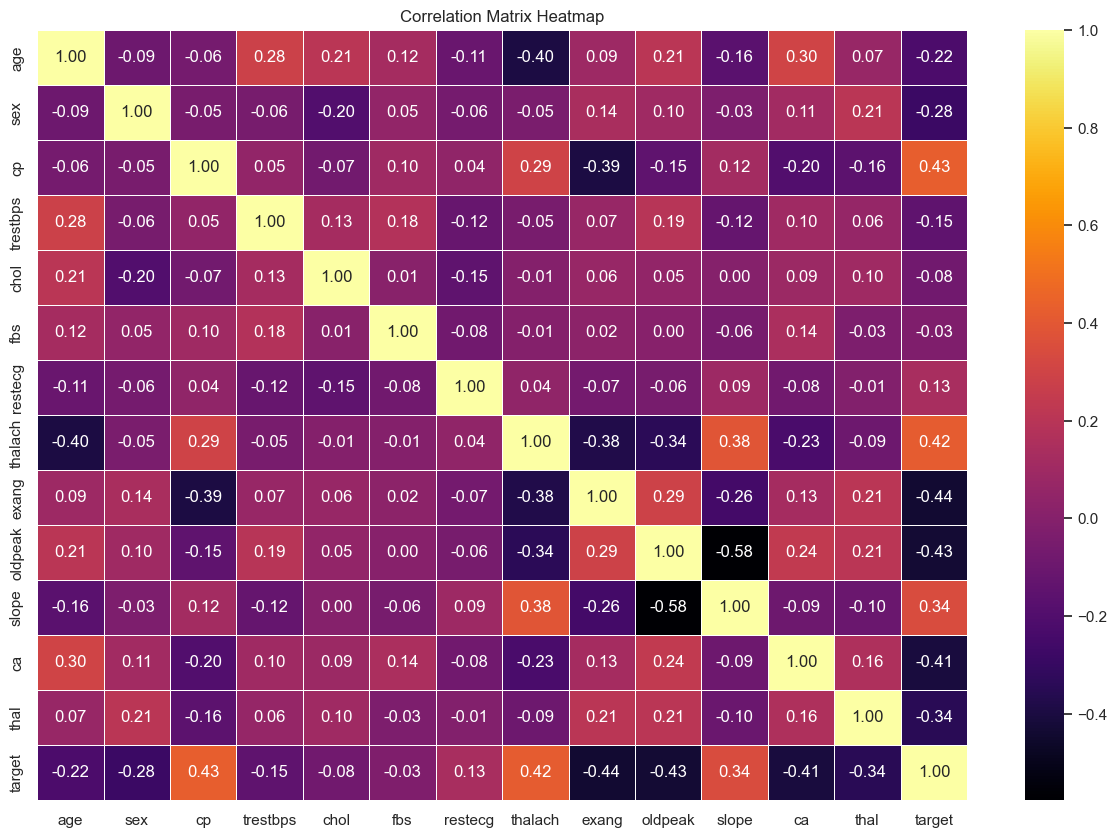

In [60]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', linewidths=0.5,fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

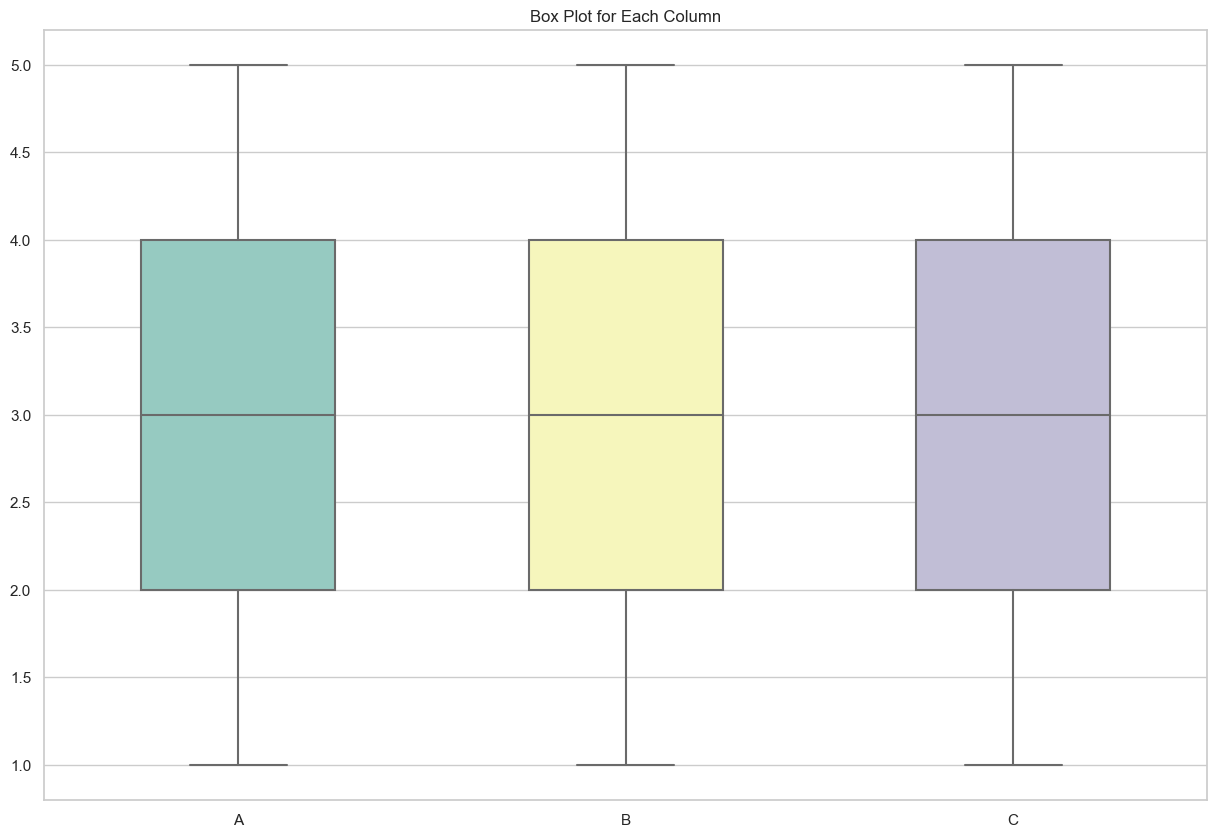

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your dataset
# Replace 'data' with your actual dataset

# Create a DataFrame with random data for demonstration
data = pd.DataFrame({'A': [1, 2, 3, 4, 5],
                     'B': [5, 4, 3, 2, 1],
                     'C': [2, 3, 1, 5, 4]})

# Set up the figure size
plt.figure(figsize=(15, 10))

# Create a box plot using Seaborn
sns.boxplot(data=data, width=0.5, palette="Set3")

# Set the title for the plot
plt.title("Box Plot for Each Column")

# Show the plot
plt.show()


In [64]:
import pandas as pd

# Assuming you have loaded or defined processed_df
processed_df = pd.DataFrame({'feature1': [1, 2, 3], 'feature2': [4, 5, 6], 'output': [7, 8, 9]})

# Now you can proceed with your correlation code
corr = processed_df.corr()
target_corr = corr['output'].drop('output')
target_corr_sorted = target_corr.sort_values(ascending=False)

# Print or use target_corr_sorted as needed
print(target_corr_sorted)


feature1    1.0
feature2    1.0
Name: output, dtype: float64


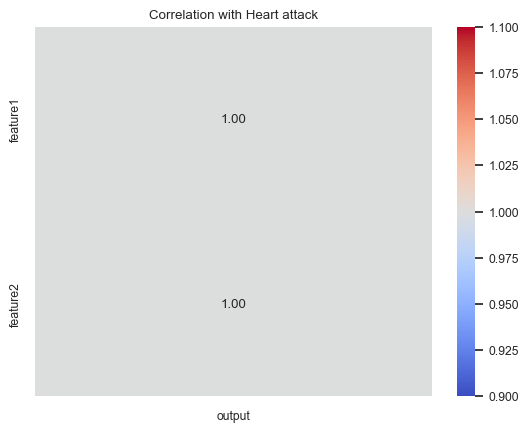

In [69]:
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("dark")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Heart attack')
plt.show()